In [1]:
import astropy.units as u
from cdalvaro.catalogues import OpenClust
from cdalvaro.data_base import DB
from cdalvaro.graphics import plot as cplt
from cdalvaro.logging import Logger
from cdalvaro.ml.utils import cluster_centers, cluster_stats
from cdalvaro.utils import safe_path, transform
import json
import logging
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns

Using plaidml.keras.backend backend.
INFO:plaidml:Opening device "metal_amd_radeon_hd_-_firepro_d700.1"


In [2]:
logger = Logger.instance()
logger.setLevel(logging.ERROR)

cplt.N_SAMPLES = 0
save_figures = cplt.N_SAMPLES == 0

db = DB.instance(host='gaia.cdalvaro.io', port=15432)

figures_save_dir = Path("../../figures")
save_figure_settings = {
    'format': 'png',
    'dpi': 300,
    'save_dir': figures_save_dir
}

In [3]:
clusters = OpenClust.catalogue(as_dataframe=False)

In [4]:
cluster = clusters["Melotte 25"]
df = db.get_stars(region=cluster)

save_dir = figures_save_dir / safe_path(cluster.name)
save_dir.mkdir(exist_ok=True)
save_figure_settings['save_dir'] = save_dir

pos_attr = {  }
pm_attr = { 'xlim': (-100, 200), 'ylim': (-150, 100) }
parallax_attr = { 'xlim': (-10, 30), 'ylim': (0, 0.001), 'stat': 'density' }
hr_attr = { 'xlim': (-1, 4), 'ylim': (3, 21) }

csv_name = 'MELOTTE25.csv'
csv = pd.read_csv(f'data/{csv_name}')
df['cluster_g'] = df.index.get_level_values('source_id').isin(csv.source_id)
df['cluster_g'] = df['cluster_g'].replace({True: cluster.name, False: ""})
df.sort_values(by='cluster_g', inplace=True)

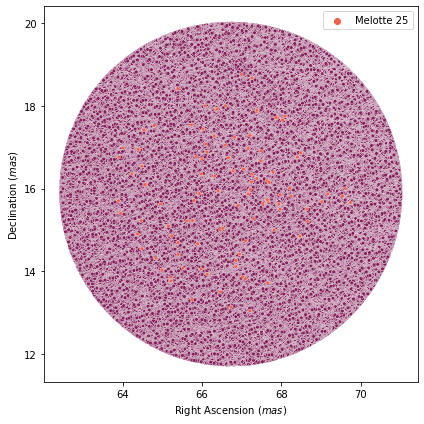

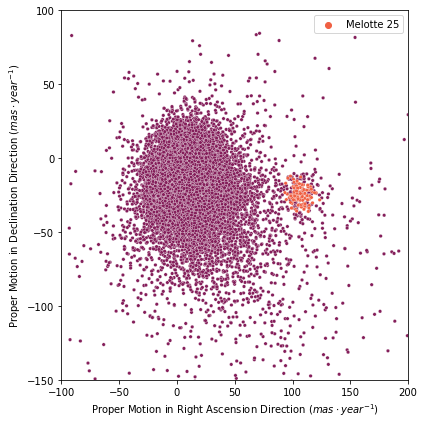

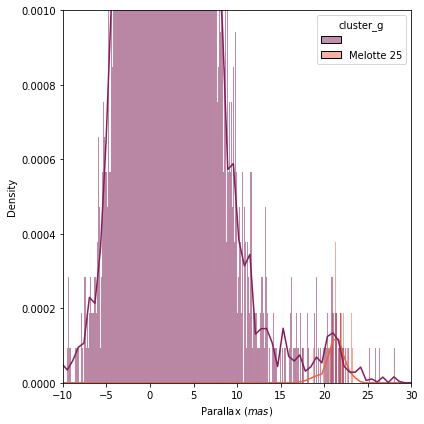

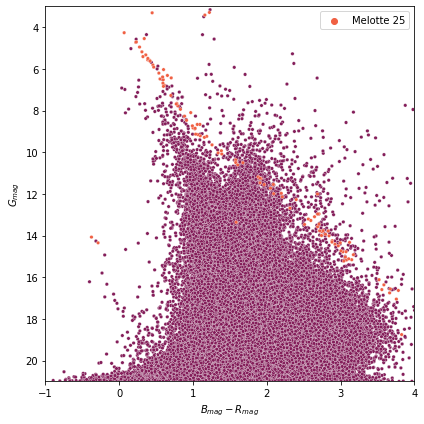

In [5]:
# Position
fig, ax, g = cplt.plot_cluster_position(df, **pos_attr, legend=True)
if save_figures:
    cplt.save_figure(fig, name=f"pos_{cluster.name}", **save_figure_settings)

# Proper Motion
fig, ax, g = cplt.plot_cluster_proper_motion(df, **pm_attr, legend=True)
if save_figures:
    cplt.save_figure(fig, name=f"pm_{cluster.name}", **save_figure_settings)

# Parallax
fig, ax, g = cplt.plot_cluster_parallax_histogram(df, **parallax_attr, legend=True)
if save_figures:
    cplt.save_figure(fig, name=f"parallax_{cluster.name}", **save_figure_settings)

# Isochrone
fig, ax, g = cplt.plot_cluster_hr_diagram_curve(df, **hr_attr, legend=True)
if save_figures:
    cplt.save_figure(fig, name=f"hr_diagram_{cluster.name}", **save_figure_settings)

In [6]:
cluster_centers(df, key='cluster_g', columns=['pmra', 'pmdec', 'parallax'])

,pmra,pmdec,parallax
cluster_g,,,
,2.694095,-4.120637,0.780778
Melotte 25,106.794595,-24.869689,21.210065


In [7]:
df_stats = cluster_stats(df, key='cluster_g', columns=['pmra', 'pmdec', 'parallax'])
df_stats.xs('std', axis=1, level=1, drop_level=False)

,pmra,pmdec,parallax
,std,std,std
cluster_g,,,
,7.873430,8.758735,1.424736
Melotte 25,6.228709,5.416756,1.114866


In [8]:
df['cluster_g'].value_counts()

              433887
Melotte 25       109
Name: cluster_g, dtype: int64